<a href="https://colab.research.google.com/github/sonadevassia/codsoft_internship_movie_genre_classification/blob/main/Intern_Movie_genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MOVIE GENRE CLASSIFICATION**

**Data Loading-Training Data**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train=pd.read_csv('/content/train_data.txt',header=None,sep=':::',encoding='ISO-8859-1')
df_train.columns=['Id','Title','Genre','Description']
df_train

<ipython-input-31-186a169b6357>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_train=pd.read_csv('/content/train_data.txt',header=None,sep=':::',encoding='ISO-8859-1')


,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


**Data Loading-Testing Data**

In [32]:
df_test=pd.read_csv('/content/test_data.txt',header=None,sep=':::',encoding='ISO-8859-1')
df_test.columns=['Id','Title','Description']
df_test

<ipython-input-32-0186870dd432>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_test=pd.read_csv('/content/test_data.txt',header=None,sep=':::',encoding='ISO-8859-1')


,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papÃ¡ (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [33]:
df_train.head()

,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [34]:
df_test.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papÃ¡ (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [35]:
df_train.dtypes

Id              int64
Title          object
Genre          object
Description    object
dtype: object

In [36]:
df_test.dtypes

Id              int64
Title          object
Description    object
dtype: object

In [37]:
df_train.isna().sum()

Id             0
Title          0
Genre          0
Description    0
dtype: int64

In [38]:
df_test.isna().sum()

Id             0
Title          0
Description    0
dtype: int64

In [39]:
dfe=pd.concat([df_train,df_test],axis=0)
dfe

,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",NaN,"Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),NaN,As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),NaN,A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),NaN,"Popular, but mysterious rock D.J Mike Mallard..."


In [40]:
dfe.drop(['Id'],axis=1,inplace=True)
dfe


,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54195,"""Tales of Light & Dark"" (2013)",NaN,"Covering multiple genres, Tales of Light & Da..."
54196,Der letzte Mohikaner (1965),NaN,As Alice and Cora Munro attempt to find their...
54197,Oliver Twink (2007),NaN,A movie 169 years in the making. Oliver Twist...
54198,Slipstream (1973),NaN,"Popular, but mysterious rock D.J Mike Mallard..."


In [41]:
dfe.isna().sum()

Title              0
Genre          54200
Description        0
dtype: int64

In [42]:
dfe['Genre'].value_counts()

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

Text(0, 0.5, 'Count')

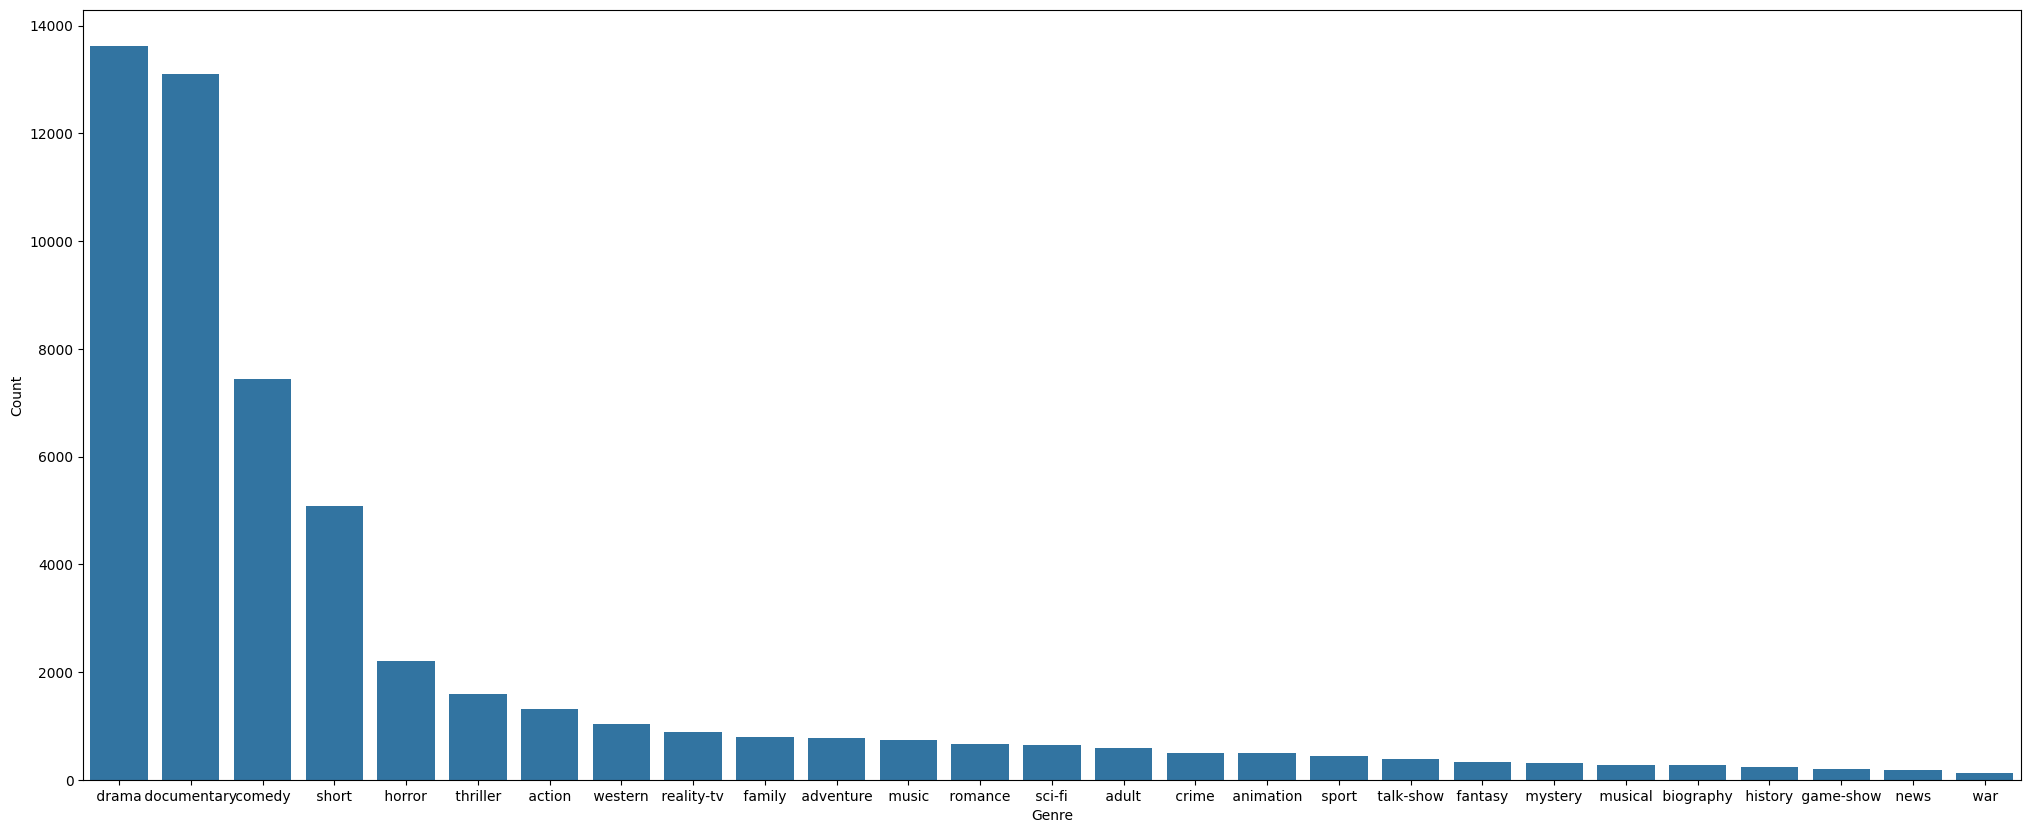

In [43]:
plt.figure(figsize=(25,10))
counts =dfe.Genre.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Genre')
plt.ylabel('Count')


In [44]:
a=dfe['Genre'].mode()[0]
dfe['Genre'].fillna(a,inplace=True)

In [45]:
dfe.isna().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [46]:
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [47]:
desc=dfe['Description']
desc

0         Listening in to a conversation between his do...
1         A brother and sister with a past incestuous r...
2         As the bus empties the students for their fie...
3         To help their unemployed father make ends mee...
4         The film's title refers not only to the un-re...
                               ...                        
54195     Covering multiple genres, Tales of Light & Da...
54196     As Alice and Cora Munro attempt to find their...
54197     A movie 169 years in the making. Oliver Twist...
54198     Popular, but mysterious rock D.J Mike Mallard...
54199     Curitiba is a city in movement, with rhythms ...
Name: Description, Length: 108414, dtype: object

In [48]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
desc=desc.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
desc

0        Listening in to a conversation between his doc...
1        A brother and sister with a past incestuous re...
2        As the bus empties the students for their fiel...
3        To help their unemployed father make ends meet...
4        The film's title refers not only to the un-rec...
                               ...                        
54195    Covering multiple genres , Tales of Light & Da...
54196    As Alice and Cora Munro attempt to find their ...
54197    A movie 169 years in the making . Oliver Twist...
54198    Popular , but mysterious rock D . J Mike Malla...
54199    Curitiba is a city in movement , with rhythms ...
Name: Description, Length: 108414, dtype: object

In [49]:
desc=desc.str.replace('[^a-zA_Z0-9]+',' ')
desc

0        Listening in to a conversation between his doc...
1        A brother and sister with a past incestuous re...
2        As the bus empties the students for their fiel...
3        To help their unemployed father make ends meet...
4        The film's title refers not only to the un-rec...
                               ...                        
54195    Covering multiple genres , Tales of Light & Da...
54196    As Alice and Cora Munro attempt to find their ...
54197    A movie 169 years in the making . Oliver Twist...
54198    Popular , but mysterious rock D . J Mike Malla...
54199    Curitiba is a city in movement , with rhythms ...
Name: Description, Length: 108414, dtype: object

In [50]:
from nltk.tokenize import word_tokenize
desc=desc.apply(lambda x:' '.join([w for w in word_tokenize(x) if len(w)>=3]))
desc

0        Listening conversation between his doctor and ...
1        brother and sister with past incestuous relati...
2        the bus empties the students for their field t...
3        help their unemployed father make ends meet Ed...
4        The film title refers not only the un-recovere...
                               ...                        
54195    Covering multiple genres Tales Light Dark anth...
54196    Alice and Cora Munro attempt find their father...
54197    movie 169 years the making Oliver Twist the Ar...
54198    Popular but mysterious rock Mike Mallard Askew...
54199    Curitiba city movement with rhythms and differ...
Name: Description, Length: 108414, dtype: object

In [51]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
desc=desc.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
desc

0        listen convers between his doctor and parent y...
1        brother and sister with past incestu relations...
2        the bus empti the student for their field trip...
3        help their unemploy father make end meet edith...
4        the film titl refer not onli the un-recov bodi...
                               ...                        
54195    cover multipl genr tale light dark antholog we...
54196    alic and cora munro attempt find their father ...
54197    movi 169 year the make oliv twist the art dodg...
54198    popular but mysteri rock mike mallard askew wh...
54199    curitiba citi movement with rhythm and differ ...
Name: Description, Length: 108414, dtype: object

In [52]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
desc=desc.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))
desc

0        listen convers doctor parent year-old oscar le...
1        brother sister past incestu relationship curre...
2        bus empti student field trip museum natur hist...
3        help unemploy father make end meet edith twin ...
4        film titl refer onli un-recov bodi ground zero...
                               ...                        
54195    cover multipl genr tale light dark antholog we...
54196    alic cora munro attempt find father british of...
54197    movi 169 year make oliv twist art dodger fagin...
54198    popular mysteri rock mike mallard askew broadc...
54199    curitiba citi movement rhythm differ pulsat gr...
Name: Description, Length: 108414, dtype: object

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(desc)
print(train_data)

  (0, 16390)	0.13165626902279495
  (0, 93945)	0.19116137598207303
  (0, 121013)	0.15026195888197896
  (0, 24169)	0.11419755347704928
  (0, 11255)	0.20529921671587856
  (0, 37744)	0.2081724447055299
  (0, 28038)	0.19957820876782953
  (0, 97141)	0.13246623099692909
  (0, 45395)	0.06976614244881972
  (0, 26763)	0.10692272544078198
  (0, 45816)	0.1091012201577247
  (0, 73763)	0.06732401267555245
  (0, 72239)	0.05706210532180219
  (0, 5620)	0.11598125144138159
  (0, 23431)	0.1318389305260009
  (0, 136571)	0.11031297151526698
  (0, 58110)	0.1192078111546695
  (0, 137195)	0.18106034936414783
  (0, 98719)	0.11729210170369749
  (0, 40825)	0.0919822914990014
  (0, 41667)	0.16093468622335536
  (0, 130686)	0.08485613715803703
  (0, 8013)	0.1217071102749066
  (0, 24691)	0.13685998246786307
  (0, 117853)	0.1881313036820978
  :	:
  (108413, 34420)	0.1291166399450757
  (108413, 39665)	0.1513501503461663
  (108413, 26443)	0.11416017040155611
  (108413, 93247)	0.09851189148195218
  (108413, 79704)	0.083

In [54]:
train_data.shape

(108414, 140390)

**Encoding**

In [55]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
dfe['Genre']=lab.fit_transform(dfe['Genre'])

In [56]:
y=dfe['Genre'].values
y

array([ 8, 24,  1, ...,  8,  8,  8])

**Traing & Testing Data Splitting**

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.30,random_state=42)

In [58]:
x_train

<75889x140390 sparse matrix of type '<class 'numpy.float64'>'
	with 3646107 stored elements in Compressed Sparse Row format>

In [59]:
x_test

<32525x140390 sparse matrix of type '<class 'numpy.float64'>'
	with 1571004 stored elements in Compressed Sparse Row format>

In [60]:
y_train

array([21,  8,  7, ...,  8,  8,  7])

In [61]:
y_test

array([8, 8, 7, ..., 8, 8, 8])

**Naive - Bayes Model**

In [62]:
from sklearn.naive_bayes import MultinomialNB
bayes_model=MultinomialNB()
bayes_model.fit(x_train,y_train)
y_pred=bayes_model.predict(x_test)
y_pred

array([8, 8, 8, ..., 8, 8, 8])

**Model Evaluation - Naive Bayes**

In [63]:
from sklearn.metrics import accuracy_score
score1=accuracy_score(y_test,y_pred)
score1


0.6234281322059954

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.prdict(x_test)
y_pred_dt

In [ ]:
from sklearn.metrics import accuracy_score
acc_dt= accuracy_score(y_test, y_pred_dt)
acc_dt